In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('../data/train_test_data/train.csv')
data.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_canceled
0,Resort Hotel,156,2016,December,52,22,2,3,1,0.0,...,250.0,NaN,0,Transient-Party,57.22,0,3,Check-Out,2016-12-27,0
1,Resort Hotel,84,2015,September,38,14,4,10,2,0.0,...,241.0,NaN,0,Transient,103.51,1,0,Check-Out,2015-09-28,0
2,Resort Hotel,87,2015,July,30,25,2,4,2,0.0,...,240.0,NaN,0,Transient,134.00,0,3,Canceled,2015-06-02,1
3,City Hotel,190,2016,April,15,9,1,1,2,0.0,...,NaN,NaN,31,Transient-Party,70.00,0,0,Canceled,2015-12-09,1
4,Resort Hotel,8,2016,August,36,28,2,1,2,0.0,...,240.0,NaN,0,Transient,171.00,0,0,Canceled,2016-08-21,1


In [3]:
def data_overview(df):
    print("Rows :  " , df.shape[0])
    print("Columns:  " , df.shape[1] )
    print()
    print("Feature types:  ")
    print(df.dtypes)
    print()
    print('Missing values : ')
    print(df.isnull().sum()) 
    print()
    print('Unique values:')
    print(df.nunique())
data_overview(data)

Rows :   95512
Columns:   32

Feature types:  
hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                        

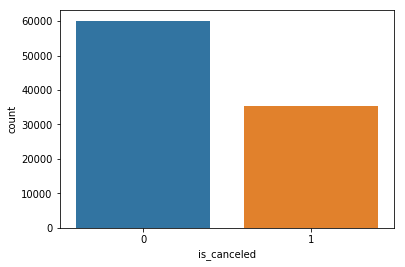

In [4]:
sns.countplot(x='is_canceled',data=data)  # canceled cases is about 60% of not-canceled cases

In [5]:
cancel_rate = data[data.is_canceled==1].shape[0]/data.shape[0]
cancel_rate

0.3711261412178574

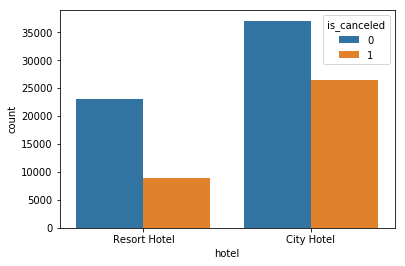

In [6]:
sns.countplot(x='hotel',hue='is_canceled',data=data)  # the cancel rate seems higher in City Hotels

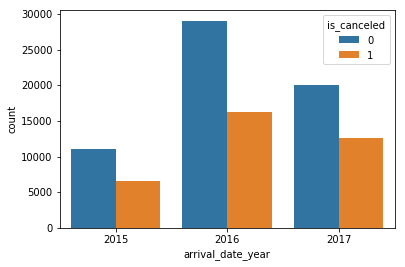

In [7]:
sns.countplot(x='arrival_date_year', hue='is_canceled', data=data)
# arrival_date_year does not have affects on cancel rate

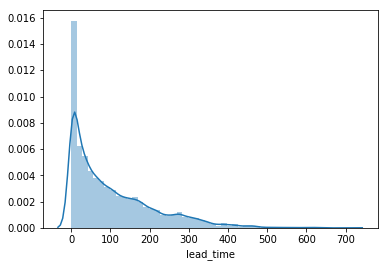

In [8]:
# lead_time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
x=data.lead_time
sns.distplot(x)
# postive skew, most people prefer to book their rooms 150 days before

[Text(0, 0, 'December'),
 Text(0, 0, 'September'),
 Text(0, 0, 'July'),
 Text(0, 0, 'April'),
 Text(0, 0, 'August'),
 Text(0, 0, 'October'),
 Text(0, 0, 'March'),
 Text(0, 0, 'June'),
 Text(0, 0, 'May'),
 Text(0, 0, 'January'),
 Text(0, 0, 'February'),
 Text(0, 0, 'November')]

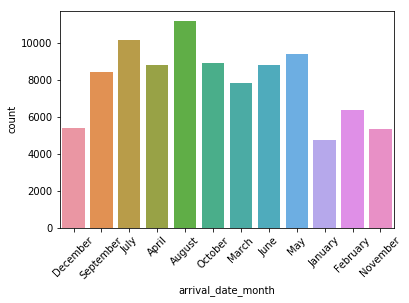

In [9]:
chart = sns.countplot(x='arrival_date_month', data=data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
# winter is Off-season
# summer is Peak season
# summer holidays(July and August) have the most bookings

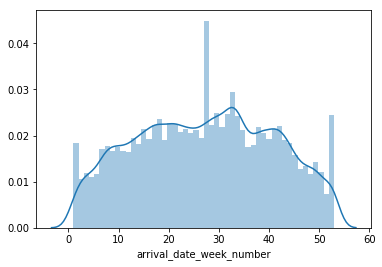

In [10]:
# arrival_date_week_number: Week number of year for arrival date
x=data.arrival_date_week_number
sns.distplot(x)
# same distribution as arrival_date_month

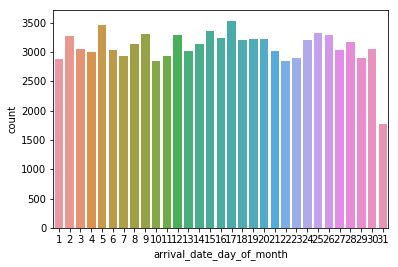

In [11]:
# arrival_date_day_of_month
sns.countplot(x='arrival_date_day_of_month', data=data)
# no obvious trend found

In [12]:
# a method to transform month, then merge with day and year
transform_month_num = {'January': 1,
                       'February': 2,
                       'March': 3,
                       'April': 4,
                       'May': 5,
                       'June': 6,
                       'July': 7,
                       'August': 8,
                       'September': 9,
                       'October': 10,
                       'November': 11,
                       'December': 12}

data['arrival_date_month'] = data['arrival_date_month'].map(
    transform_month_num)

date = data['arrival_date_year'].map(
    str)+"-"+data['arrival_date_month'].map(str)+"-"+data['arrival_date_day_of_month'].map(str)

date[0]

'2016-12-22'

[Text(0, 0, 'Tuesday'),
 Text(0, 0, 'Monday'),
 Text(0, 0, 'Wednesday'),
 Text(0, 0, 'Sunday'),
 Text(0, 0, 'Friday'),
 Text(0, 0, 'Thursday'),
 Text(0, 0, 'Saturday')]

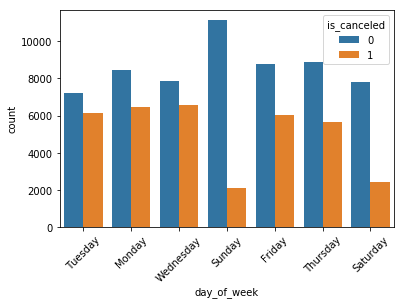

In [13]:
# transform date to day of week
data['reservation_status_date'] = pd.to_datetime(
    data['reservation_status_date'], errors='coerce')
data['day_of_week'] = data['reservation_status_date'].dt.dayofweek
transform_num_day_of_week = {0: 'Monday',
                             1: 'Tuesday',
                             2: 'Wednesday',
                             3: 'Thursday',
                             4: 'Friday',
                             5: 'Saturday',
                             6: 'Sunday'}
data['day_of_week'] = data['day_of_week'].map(transform_num_day_of_week)

chart2 = sns.countplot(x='day_of_week',hue='is_canceled', data=data)
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=45)

# reservation_status_date: Date at which the last status was set. 
# This variable can be used in conjunction with the ReservationStatus 
# to understand when was the booking canceled or when did the customer checked-out of the hotel

# Monday is the day the most people set the last status, while weekends(Saturday and Sunday) seem to be the least

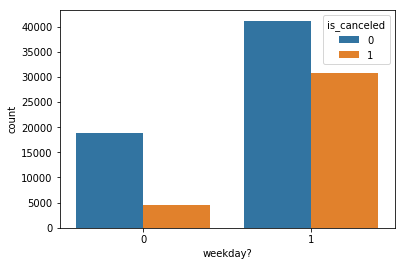

In [14]:
transform_day_weekday = {'Monday': '1',
                         'Tuesday': '1',
                         'Wednesday': '1',
                         'Thursday': '1',
                         'Friday': '1',
                         'Saturday': '0',
                         'Sunday': '0'}
data['weekday?'] = data['day_of_week'].map(transform_day_weekday)

sns.countplot(x='weekday?', hue='is_canceled', data=data)
# higher cancel rate in weekdays

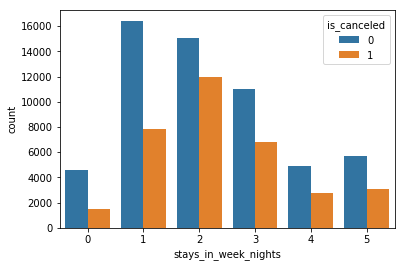

In [52]:
sns.countplot(x='stays_in_week_nights',hue='is_canceled', data=data[data.stays_in_week_nights<6])
# postive skew, most people stay in week nights <= 5 days

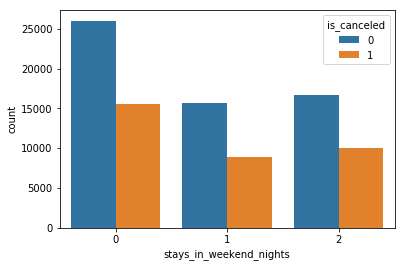

In [54]:
sns.countplot(x='stays_in_weekend_nights', hue='is_canceled', data=data[data.stays_in_weekend_nights<3])
# postive skew, most people stay in week nights <= 2 days

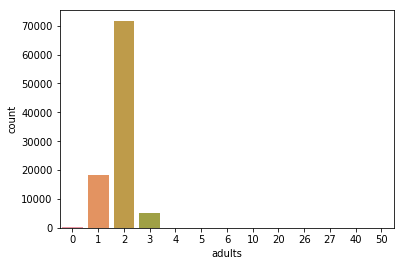

In [17]:
sns.countplot(x='adults', data=data)
# 1,2,3 adults are the most cases
# 2 adults is the most common case

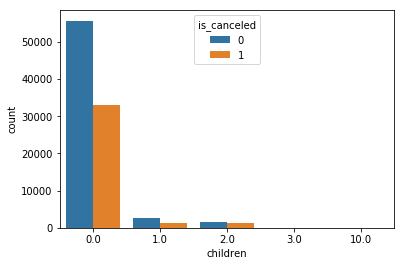

In [18]:
sns.countplot(x='children', hue='is_canceled',data=data)
# no child is the most common case
# with 2 children cases have the highest cancal rate

In [49]:
data.children.value_counts()

0.0     88681
1.0      3878
2.0      2888
3.0        61
10.0        1
Name: children, dtype: int64

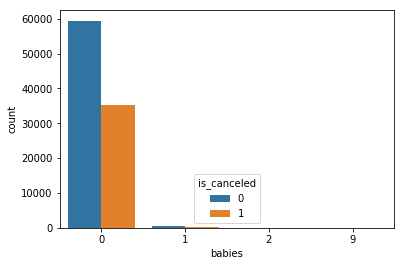

In [19]:
sns.countplot(x='babies', hue='is_canceled' ,data=data)
# no baby is the most common case

In [50]:
data.babies.value_counts()

0    94773
1      725
2       13
9        1
Name: babies, dtype: int64

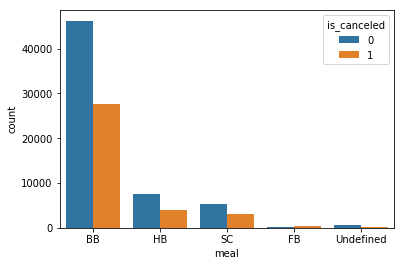

In [20]:
# Type of meal booked. 
# Categories are presented in standard hospitality meal packages: 
# Undefined/SC – no meal package; 
# BB – Bed & Breakfast; 
# HB – Half board (breakfast and one other meal – usually dinner);
# FB – Full board (breakfast, lunch and dinner)
sns.countplot(x='meal', hue='is_canceled', data=data)
# Only in FB, canceled cases > not canceled cases!

In [21]:
data.country.value_counts()[0:10]  # most of clients are europeans

PRT    38868
GBR     9714
FRA     8329
ESP     6798
DEU     5799
ITA     3030
IRL     2715
BEL     1872
BRA     1773
USA     1698
Name: country, dtype: int64

[Text(0, 0, 'Direct'),
 Text(0, 0, 'Online TA'),
 Text(0, 0, 'Groups'),
 Text(0, 0, 'Offline TA/TO'),
 Text(0, 0, 'Corporate'),
 Text(0, 0, 'Complementary'),
 Text(0, 0, 'Aviation'),
 Text(0, 0, 'Undefined')]

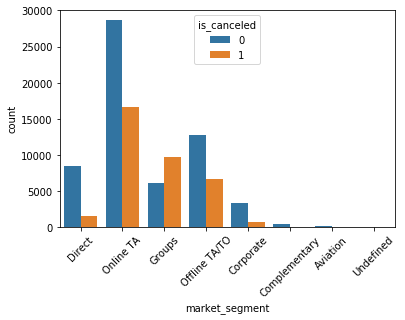

In [22]:
# market_segment: Market segment designation.
# In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
chart3 = sns.countplot(x='market_segment', hue='is_canceled', data=data)
chart3.set_xticklabels(chart3.get_xticklabels(), rotation=45)
# Only in Groups, canceled cases > not canceled cases!

[Text(0, 0, 'Direct'),
 Text(0, 0, 'TA/TO'),
 Text(0, 0, 'Corporate'),
 Text(0, 0, 'GDS'),
 Text(0, 0, 'Undefined')]

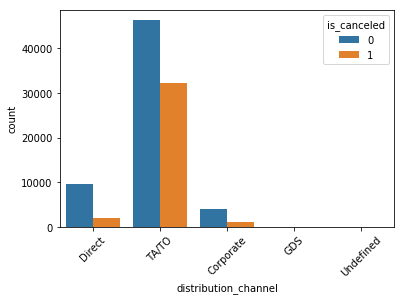

In [23]:
# distribution_channel: Booking distribution channel. 
# The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
chart4 = sns.countplot(x='distribution_channel', hue='is_canceled', data=data)
chart4.set_xticklabels(chart4.get_xticklabels(), rotation=45)
# most clients book by TA/TO

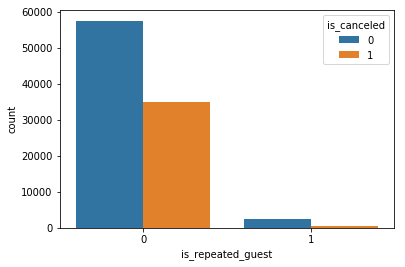

In [24]:
sns.countplot(x='is_repeated_guest', hue='is_canceled', data=data)
# lower cancel rate for repeated guest

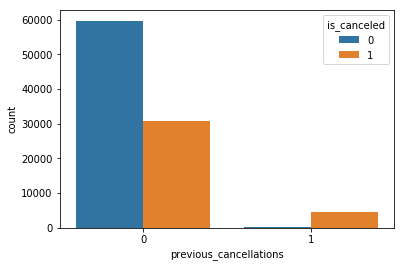

In [25]:
sns.countplot(x='previous_cancellations', hue='is_canceled', data=data[data.previous_cancellations<2])
# Those canceled before have a far more higher possiblity to cancel again!

In [51]:
data.previous_cancellations.value_counts()

0     90304
1      4869
2        89
3        54
24       37
11       28
4        26
26       19
25       19
19       17
6        17
14       13
5        12
13        7
21        1
Name: previous_cancellations, dtype: int64

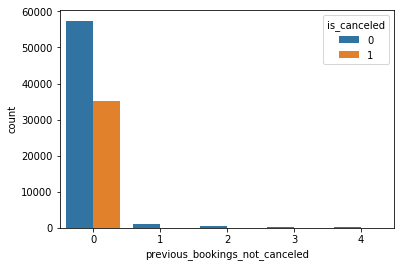

In [26]:
sns.countplot(x='previous_bookings_not_canceled', hue='is_canceled', data=data[data.previous_bookings_not_canceled<5])

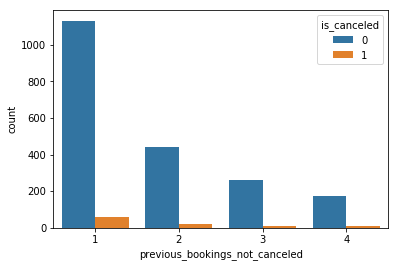

In [27]:
sns.countplot(x='previous_bookings_not_canceled', hue='is_canceled',
              data=data[data.previous_bookings_not_canceled.between(1, 4)])
# Those not canceled before have a far more lower possiblity to cancel again!

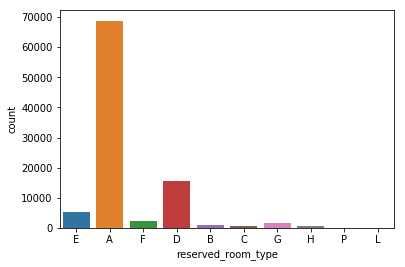

In [28]:
# Code of room type reserved.
sns.countplot(x='reserved_room_type',data=data)

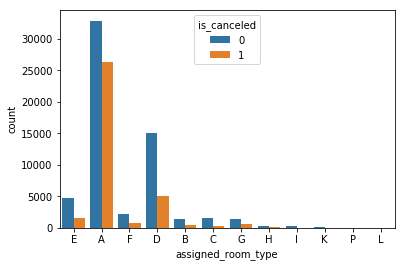

In [29]:
# Code for the type of room assigned to the booking.
sns.countplot(x='assigned_room_type', hue='is_canceled' ,data=data)
# almost the same distribution as reserved_room_type
# no obvious relation with cancel rate

In [30]:
def function(a, b):
    if a == b:
        return 1
    else:
        return 0

data['reserved=assigned'] = data.apply(lambda x : function(x['assigned_room_type'],x['reserved_room_type']),axis = 1)

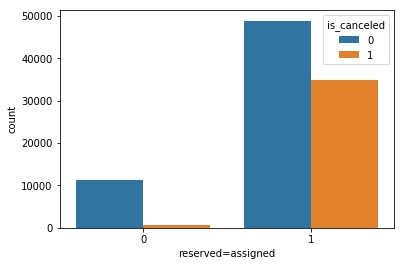

In [31]:
sns.countplot(x='reserved=assigned', hue='is_canceled', data=data)
# Those reserved room type = assigned room type have a far higher cancel rate, wired...

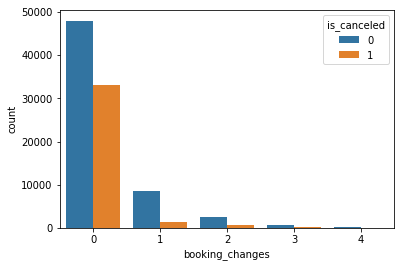

In [32]:
# booking_changes: 
# Number of changes/amendments made to the booking from the moment the booking was entered on the PMS 
# until the moment of check-in or cancellation
sns.countplot(x='booking_changes', hue='is_canceled', data=data[data.booking_changes<5])
# higher cancel rate for 0-change cases

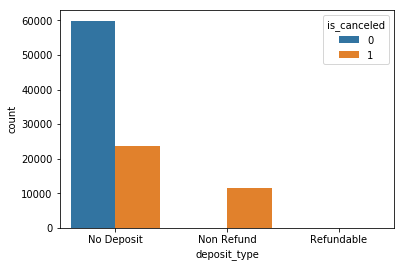

In [33]:
# deposit_type: Indication on if the customer made a deposit to guarantee the booking.
# This variable can assume three categories: 
# No Deposit – no deposit was made; 
# Non Refund – a deposit was made in the value of the total stay cost;
# Refundable – a deposit was made with a value under the total cost of stay.
sns.countplot(x='deposit_type', hue='is_canceled', data=data)
# Non Refund case has almost 100% cancel rate

In [34]:
data.deposit_type.value_counts()
# Refundable cases are so rare

No Deposit    83648
Non Refund    11732
Refundable      132
Name: deposit_type, dtype: int64

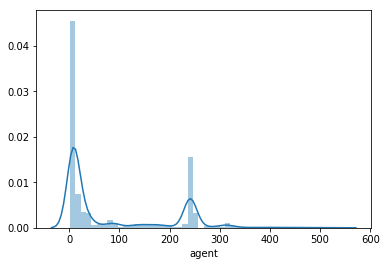

In [35]:
# ID of the travel agency that made the booking
x=data.agent
sns.distplot(x)
# ID is a useless feature

In [36]:
data['days_in_waiting_list'] = ['0' if x == 0 else '>0' for x in data['days_in_waiting_list'] ]

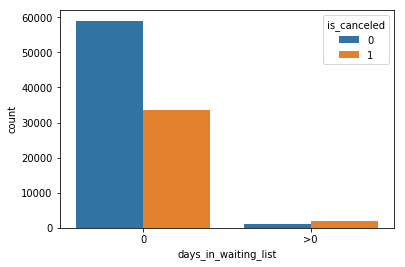

In [37]:
# days_in_waiting_list: Number of days the booking was in the waiting list before it was confirmed to the customer
sns.countplot(x='days_in_waiting_list', hue='is_canceled', data=data)
# waiting day > 0 cases have a far more cancel rate

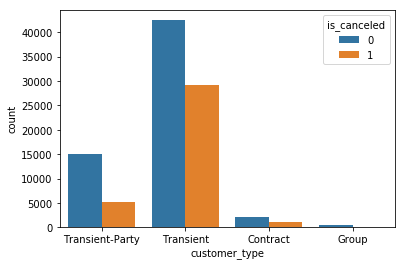

In [38]:
# Type of booking
# Contract - when the booking has an allotment or other type of contract associated to it; 
# Group – when the booking is associated to a group; 
# Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; 
# Transient-party – when the booking is transient, but is associated to at least other transient booking
sns.countplot(x='customer_type', hue='is_canceled', data=data)

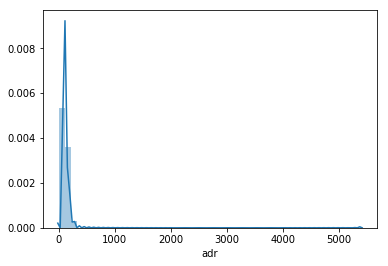

In [39]:
# Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
x=data.adr
sns.distplot(x)
# positive skew because of the outliers

In [40]:
data.adr.mean()  # 100$ in average for each day

102.00262815143648

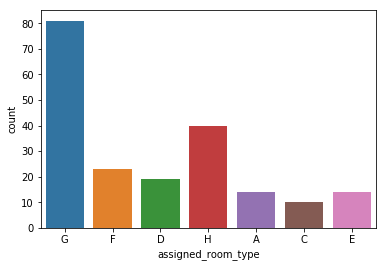

In [41]:
sns.countplot(x='assigned_room_type' ,data=data[data.adr>300])
# G, H, F are the room types with high price!
# room type makes great sence to price!

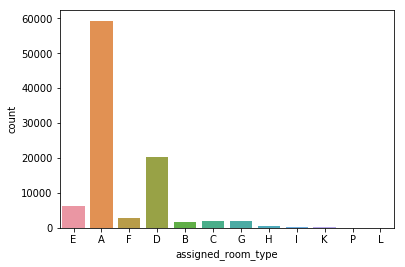

In [42]:
sns.countplot(x='assigned_room_type', data=data)

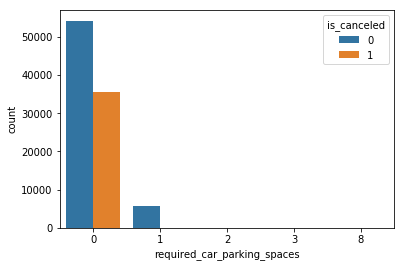

In [43]:
# Number of car parking spaces required by the customer
sns.countplot(x='required_car_parking_spaces',hue='is_canceled', data=data)
# obviouly, clients who require car park have almost 0 cancel rate!

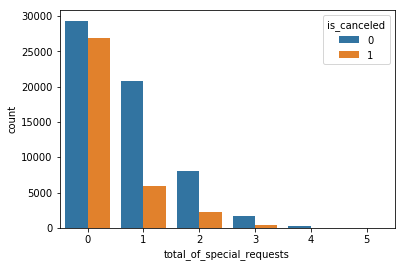

In [44]:
# Number of special requests made by the customer (e.g. twin bed or high floor)
sns.countplot(x='total_of_special_requests',hue='is_canceled', data=data)
# 0 special request clients have a higher cancel rate

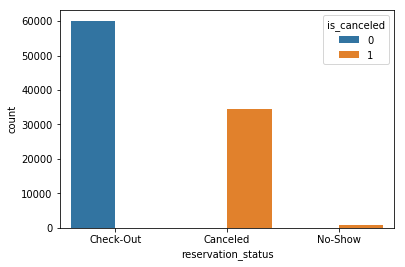

In [45]:
# Reservation last status, assuming one of three categories: 
# Canceled – booking was canceled by the customer; 
# Check-Out – customer has checked in but already departed; 
# No-Show – customer did not check-in and did inform the hotel of the reason why
sns.countplot(x='reservation_status',hue='is_canceled', data=data) 
# Cannot use this feature for predicting is_cancel

In [46]:
def correlation_heatmap(data):
    correlations = data.corr(method='pearson') # method{‘pearson’, ‘kendall’, ‘spearman’} 
    fig, ax = plt.subplots(figsize=(13, 13))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}, cmap='coolwarm')
    plt.show()

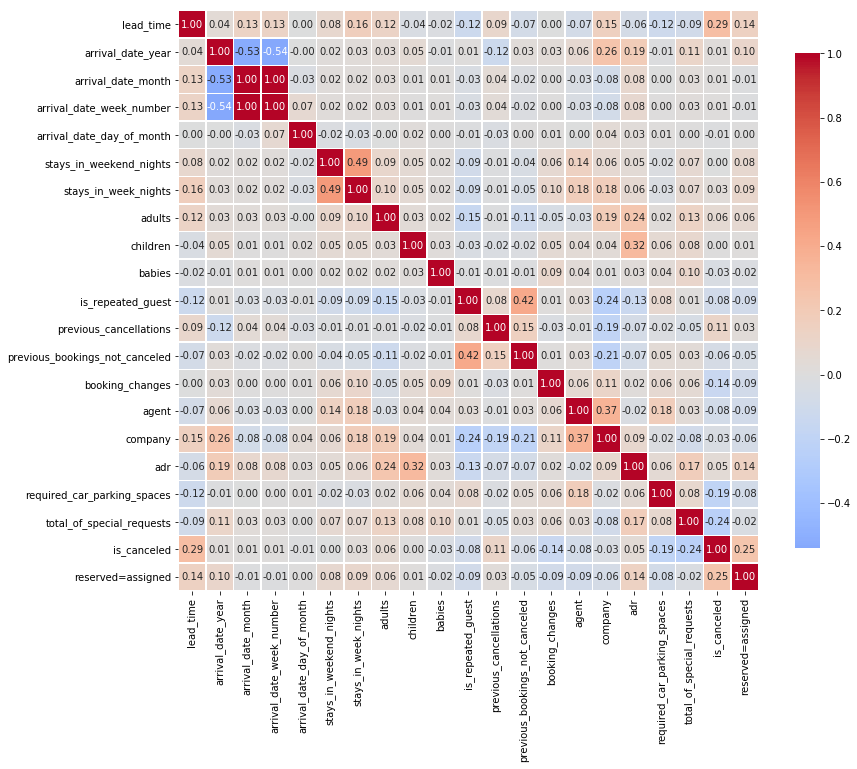

In [47]:
correlation_heatmap(data) 
# extreme correlation between arrival_date_month & arrival_week_number
# medium correlation between arrival_date_month & arrival_date_year
# medium correlation between arrival_week_number & arrival_date_year